In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv("F:\Gam3a lecs\Machine\games-regression-dataset.csv")
data.head()

,URL,ID,Name,Subtitle,Icon URL,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,Average User Rating
0,https://apps.apple.com/us/app/heir-of-light/id...,1264483706,HEIR OF LIGHT,Dark Fantasy RPG,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,982,0.00,"29.99, 19.99, 9.99, 29.99, 29.99, 8.99, 4.99, ...","A Dark Fantasy, Collectible RPG\n\nDarkness ha...",GAMEVIL Inc.,12+,"EN, FR, DE, JA, KO, ZH, ES, TH, ZH, VI",894489600,Games,"Games, Role Playing, Strategy",6/3/2018,31/07/2019,4.0
1,https://apps.apple.com/us/app/endgame-eurasia/...,607705356,Endgame:Eurasia,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,19,0.00,NaN,"""This interactive experience is an exploration...",Auroch Digital Ltd,12+,EN,116407296,Games,"Games, Simulation, Strategy, News",21/03/2013,28/06/2017,3.5
2,https://apps.apple.com/us/app/free-solitaire/i...,627491527,Free Solitaire+,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,14,0.00,NaN,Same Solitaire game with classic Solitaire run...,Chen Zhong Yuan,4+,"EN, ZH",50647040,Games,"Games, Strategy, Entertainment, Card",4/4/2013,21/04/2015,4.5
3,https://apps.apple.com/us/app/draft-trainer/id...,430252596,Draft Trainer,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,88,1.99,NaN,** Discounted for a limited time **\n\nEver wo...,"GG Wizards, LLC",9+,EN,28120064,Games,"Games, Utilities, Card, Strategy",26/05/2011,23/07/2019,3.5
4,https://apps.apple.com/us/app/rogue-knight-inf...,1115082819,Rogue Knight: Infested Lands,Tactical roguelike w/ stealth,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,13,3.99,NaN,Fight or sneak your way through hordes of mons...,Luis Regueira,12+,EN,39915520,Games,"Games, Role Playing, Strategy",19/05/2017,6/2/2019,4.5


In [ ]:
X=data.drop('Average User Rating',axis=1)
y=data['Average User Rating']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=2)

In [ ]:
train_data=pd.concat([X_train,y_train],axis='columns')
test_data=pd.concat([X_test,y_test],axis='columns')


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 253 to 2575
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           4171 non-null   object 
 1   ID                            4171 non-null   int64  
 2   Name                          4171 non-null   object 
 3   Subtitle                      1167 non-null   object 
 4   Icon URL                      4171 non-null   object 
 5   User Rating Count             4171 non-null   int64  
 6   Price                         4171 non-null   float64
 7   In-app Purchases              2535 non-null   object 
 8   Description                   4171 non-null   object 
 9   Developer                     4171 non-null   object 
 10  Age Rating                    4171 non-null   object 
 11  Languages                     4161 non-null   object 
 12  Size                          4171 non-null   int64  
 13  P

In [ ]:
train_data.shape

(4171, 18)

In [ ]:
train_data.describe()

,ID,User Rating Count,Price,Size,Average User Rating
count,4.171000e+03,4.171000e+03,4171.000000,4.171000e+03,4171.000000
mean,8.661515e+08,4.145890e+03,0.602407,1.381858e+08,4.031287
std,2.945126e+08,5.543394e+04,2.730678,2.554433e+08,0.752720
min,2.849214e+08,5.000000e+00,0.000000,2.158400e+05,1.000000
25%,5.952646e+08,1.300000e+01,0.000000,2.761677e+07,3.500000
50%,9.177783e+08,5.000000e+01,0.000000,6.700851e+07,4.000000
75%,1.112485e+09,3.380000e+02,0.000000,1.591173e+08,4.500000
max,1.341837e+09,3.032734e+06,139.990000,4.005591e+09,5.000000


In [ ]:
train_data.isnull().sum().sort_values(ascending=False)

Subtitle                        3004
In-app Purchases                1636
Languages                         10
URL                                0
Age Rating                         0
Current Version Release Date       0
Original Release Date              0
Genres                             0
Primary Genre                      0
Size                               0
Developer                          0
ID                                 0
Description                        0
Price                              0
User Rating Count                  0
Icon URL                           0
Name                               0
Average User Rating                0
dtype: int64

In [ ]:
train_data.drop(['Subtitle','In-app Purchases'],axis=1,inplace=True)

In [ ]:
train_data['Languages'].fillna(train_data['Languages'].mode()[0], inplace=True)

In [ ]:
train_data.duplicated().sum()
#remove them

25

In [ ]:
train_data.drop_duplicates(inplace=True)

# EDA

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Average User Rating', ylabel='count'>

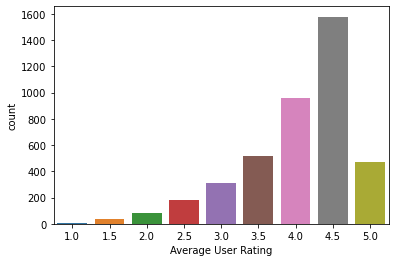

In [ ]:
sns.countplot(train_data['Average User Rating'])

Left skewed

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age Rating', ylabel='count'>

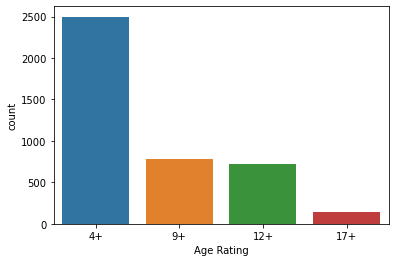

In [ ]:
sns.countplot(train_data['Age Rating'])

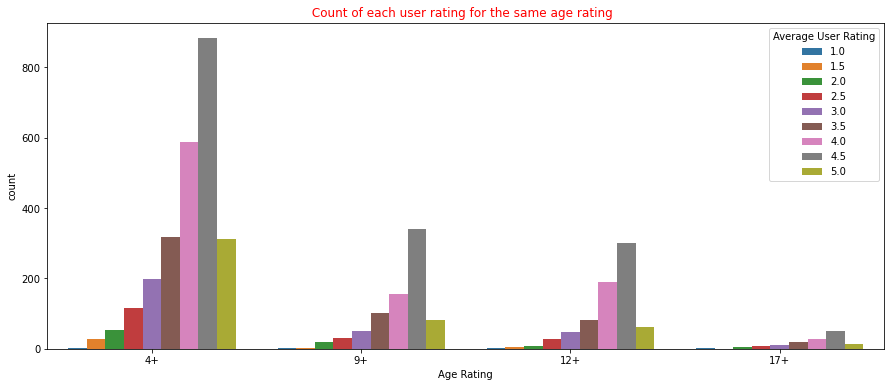

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.countplot(x ='Age Rating',hue='Average User Rating', data = train_data)
plt.title(" Count of each user rating for the same age rating   ",color="red");

disturbation is the same in all Age ratings >>> Not affected

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Size', ylabel='Density'>

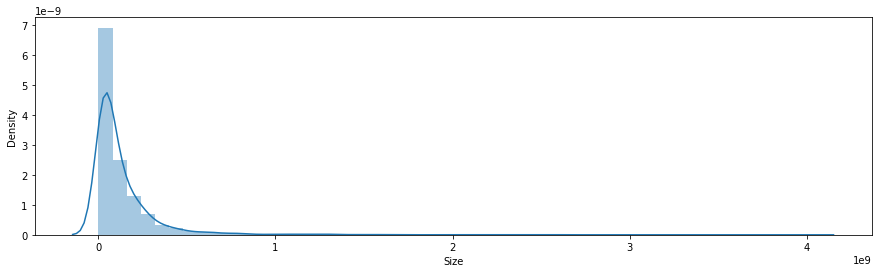

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Size'])

In [ ]:
Q1 = train_data['Size'].quantile(0.25)
Q3 = train_data['Size'].quantile(0.75)

x1=train_data[train_data['Size']<Q1]
x2=train_data[(train_data['Size']>Q1) & (train_data['Size']<Q3)]
x3=train_data[train_data['Size']>Q3]


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


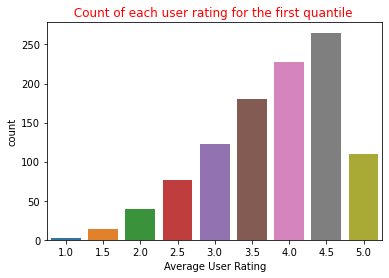

In [ ]:
sns.countplot(x1['Average User Rating'])
plt.title(" Count of each user rating for the first quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


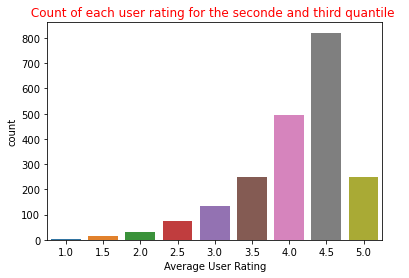

In [ ]:
sns.countplot(x2['Average User Rating'])
plt.title(" Count of each user rating for the seconde and third quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


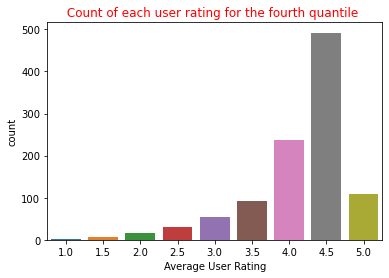

In [ ]:
sns.countplot(x3['Average User Rating'])
plt.title(" Count of each user rating for the fourth quantile  ",color="red");

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

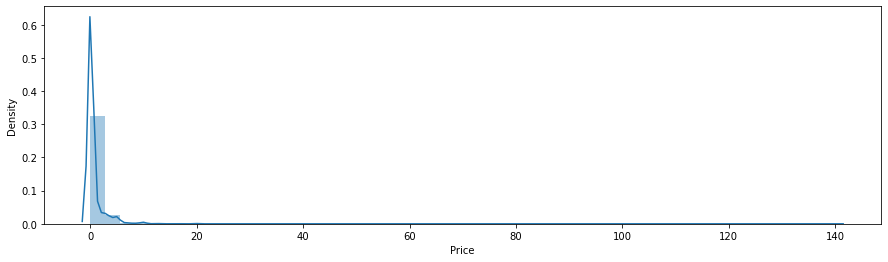

In [ ]:
plt.figure(figsize=(15,4))
sns.distplot(train_data['Price'])

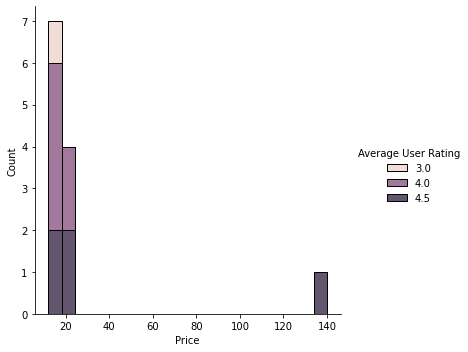

In [ ]:
u=train_data[train_data['Price']>10]
sns.displot(data=u, x="Price", hue="Average User Rating", multiple="stack")

In [ ]:
len(u)

12

If price increasing does it affect to Average user rating>>>>conclusion inc price inc Average directly porpointal

low no of row doesn't affect

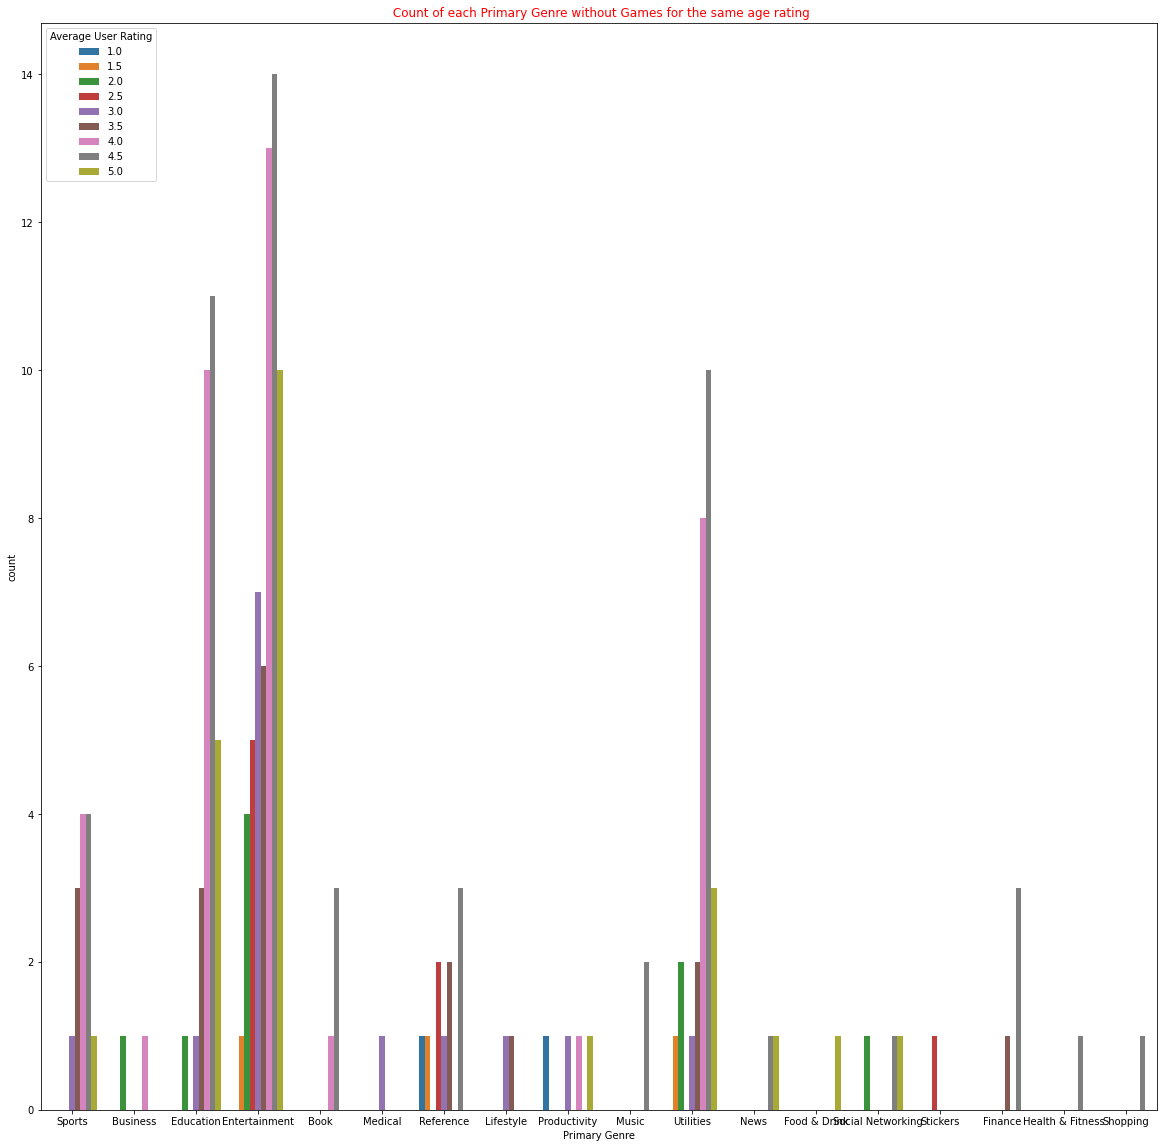

In [ ]:
plt.figure(figsize=(20,20))
u=train_data.loc[(train_data["Primary Genre"]!='Games')]

ax = sns.countplot(x ='Primary Genre',hue='Average User Rating', data = u)
plt.title(" Count of each Primary Genre without Games for the same age rating",color="red");

Outliers Detected

In [ ]:
len(u)

169

In [ ]:
# data['Original Release Date']=pd.to_datetime(data["Original Release Date"], dayfirst=True)
# data['Current Version Release Date']=pd.to_datetime(data["Current Version Release Date"], dayfirst=True)

# data['Original Release Year']=data['Original Release Date'].dt.year
# data['Current Version Release Year']=data['Current Version Release Date'].dt.year


# data.drop(['Original Release Date','Current Version Release Date'],axis=1,inplace=True)
#  plt.figure(figsize=(15,10))
# ax = sns.countplot(x ='Original Release Year',hue='Average User Rating', data = data)
# plt.title(" User Rating for each year   ",color="red");

In [ ]:
train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8296/3607878080.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Original Release Date'] = pd.to_datetime(train_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8296/3607878080.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  train_data['Current Version Release Date'] = pd.to_datetime(train_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [ ]:
train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')
train_data['Age Rating']=train_data['Age Rating'].apply(pd.to_numeric)
train_data['Age Rating']

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8296/2599777923.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_data['Age Rating']=train_data['Age Rating'].str.replace('+', '')


253      4
2592     9
1605     4
4661     4
2        4
        ..
3335     4
1099     4
2514     4
3606    12
2575     4
Name: Age Rating, Length: 4146, dtype: int64

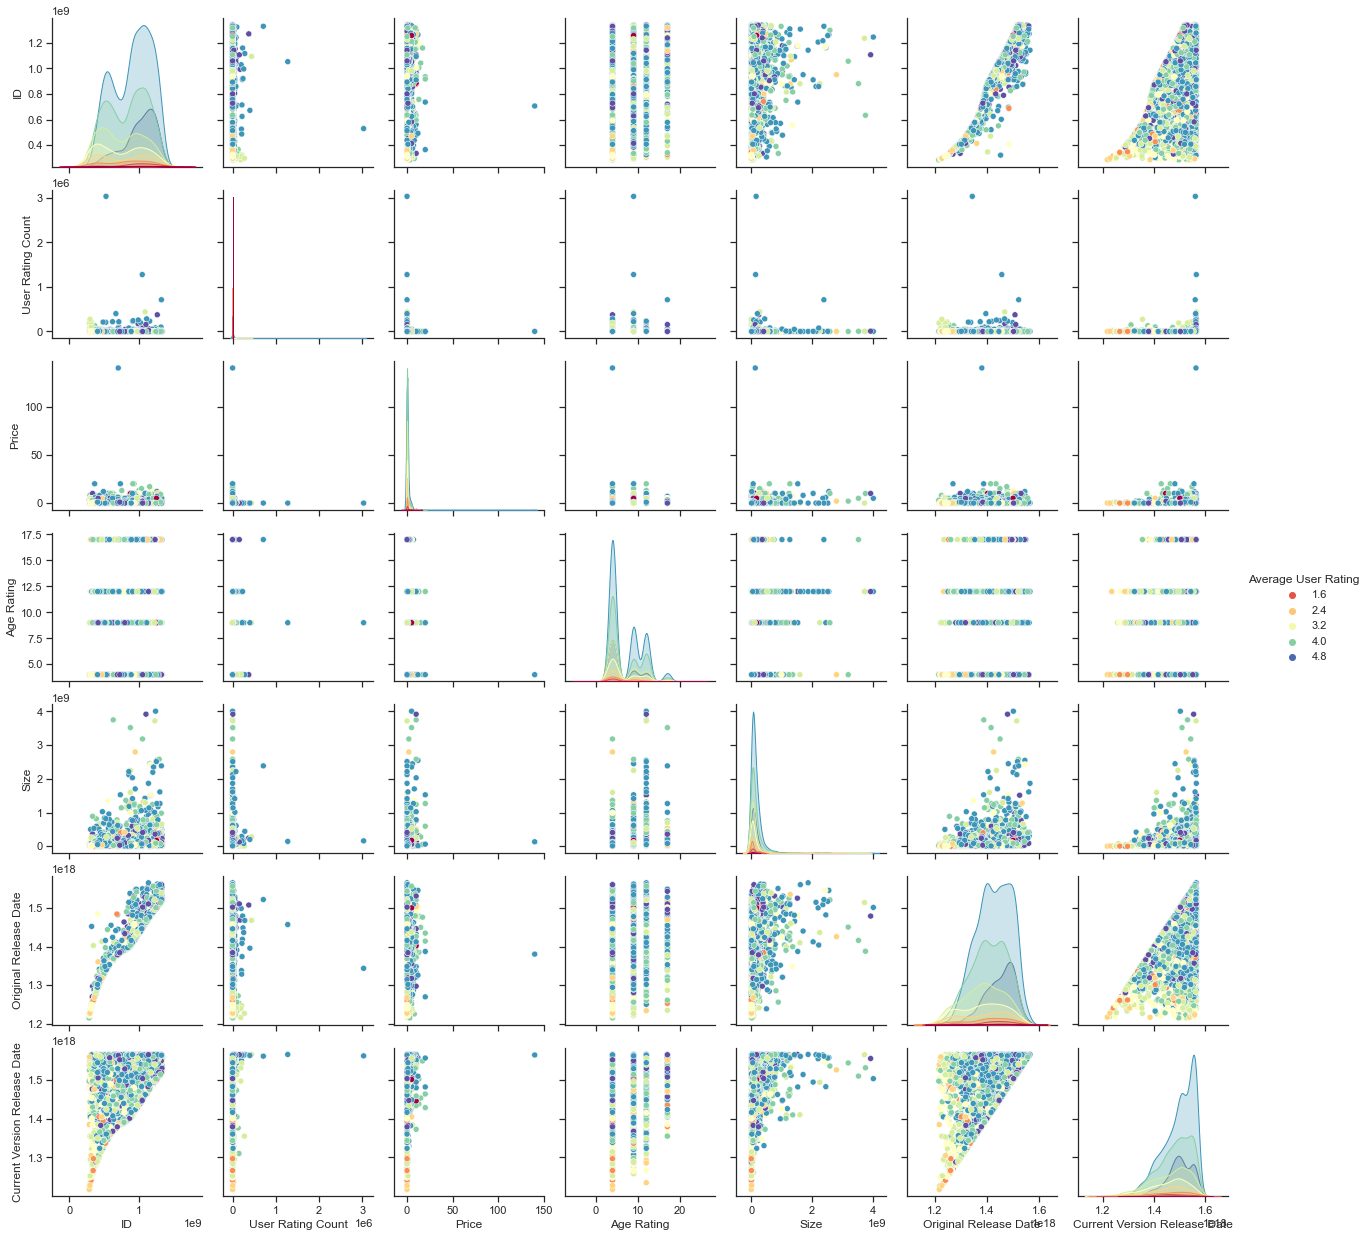

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(train_data, hue="Average User Rating",palette="Spectral")

<AxesSubplot:>

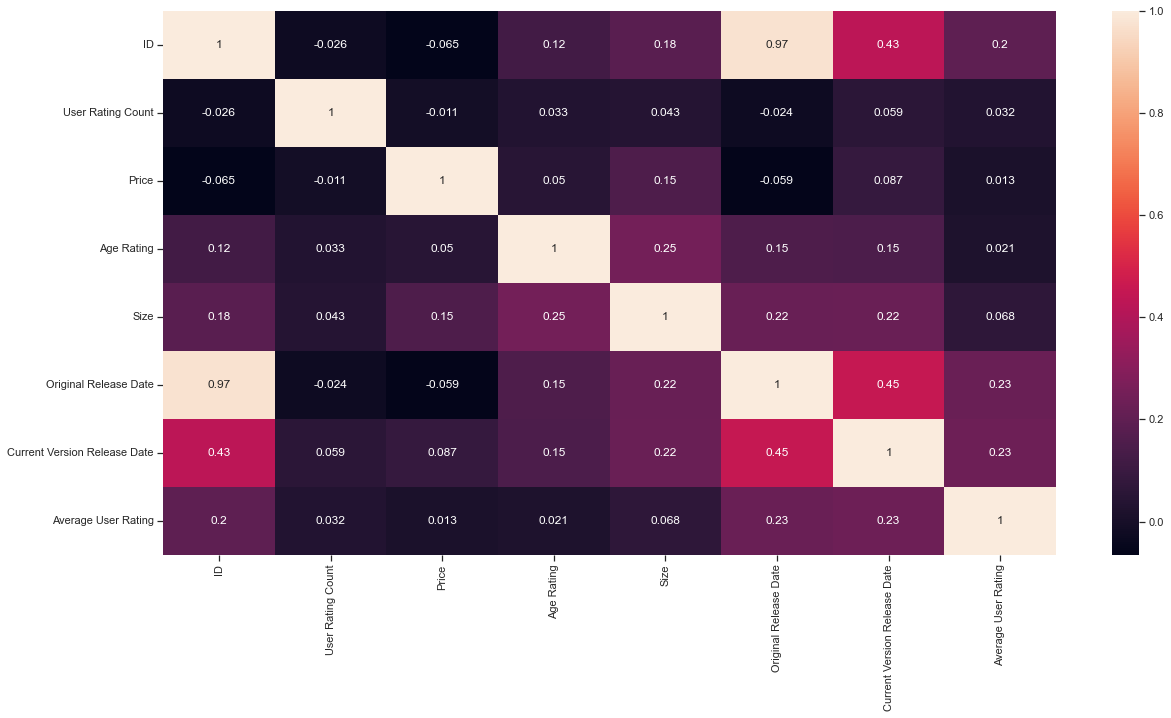

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot=True)

In [ ]:
train_data['Developer'].value_counts()

Tapps Tecnologia da Informa\xe7\xe3o Ltda.    78
Detention Apps                                27
HexWar Games Ltd                              22
EASY Inc.                                     19
Qumaron                                       19
                                              ..
Etcetera Edutainment, Inc.                     1
Laylo Inc.                                     1
Jabatoba AB                                    1
Superbrightly Studio LLC                       1
Helen Cheng                                    1
Name: Developer, Length: 2607, dtype: int64

In [ ]:
train_data['Name'].is_unique

True

In [ ]:
train_data['ID'].is_unique

True

In [ ]:
train_data['URL'].is_unique

True

In [ ]:
train_data['Icon URL'].is_unique

True

In [ ]:
train_data['Rating']=train_data['Average User Rating']
train_data['Primary']=train_data['Primary Genre']


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Rating ~ Developer', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Developer,1916.945411,2606.0,2.676255,4.014932e-93
Residual,423.005927,1539.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Primary', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Primary,25.311150,18.0,2.507208,0.000418
Residual,2314.640189,4127.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Languages', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Languages,281.905517,505.0,0.987321,0.568567
Residual,2058.045821,3640.0,NaN,NaN


In [ ]:
model = ols('Rating ~ Genres', data=train_data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
Genres,313.728820,454.0,1.258796,0.00035
Residual,2026.222519,3691.0,NaN,NaN


In [ ]:
train_data.drop(['URL','Icon URL','Name','ID','Description','Languages','Rating','Primary','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)
#data.drop(['URL','Icon URL','Name','ID','Description','Languages'],axis=1,inplace=True)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4146 entries, 253 to 2575
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Developer                     4146 non-null   object 
 1   Primary Genre                 4146 non-null   object 
 2   Genres                        4146 non-null   object 
 3   Original Release Date         4146 non-null   int64  
 4   Current Version Release Date  4146 non-null   int64  
 5   Average User Rating           4146 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 355.8+ KB


In [ ]:
def one_hot_encoding(data,to_be_hot_encoded):
    list_all_unique = []
    # Get New Columns Names.
    for feature in to_be_hot_encoded:
        unique_values = set()
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]  # Equivalent to X[feature][i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')  # ex -> valuesList = [En, Fr, Da, SP]
                for value in valuesList:
                    unique_values.add(value)

        for item in unique_values:
            list_all_unique.append(item)

    returned=update_with_new_columns(data,list_all_unique,to_be_hot_encoded)
    return returned,list_all_unique

In [ ]:
def update_with_new_columns(data,list_all_unique,to_be_hot_encoded):
    # Add New Columns.
    updated_data = data
    updated_data = updated_data.reset_index(drop=True)
    for value in list_all_unique:
        new_column_arr = np.zeros(len(data))
        new_column_df = pd.Series(new_column_arr, name=value)
        updated_data = pd.concat([updated_data, new_column_df], axis=1)

    # Remove Old Columns
    for feature in to_be_hot_encoded:
        updated_data.drop(feature, axis=1, inplace=True)

    # Add Ones in the right columns.
    for feature in to_be_hot_encoded:
        for i in range(0, len(data)):
            cell = data[feature].iloc[i]
            if not pd.isnull(cell):
                valuesList = cell.split(',')
                for value in valuesList:
                    if value in updated_data: # Check if 'value' is seen in training operation.     #else: ignore it.
                        value_i = updated_data.columns.get_loc(value)
                        updated_data.iloc[i, value_i] = 1

    # Update.
    return updated_data

In [ ]:
traain,list_unquie_train=one_hot_encoding(train_data,['Genres','Developer','Primary Genre'])

In [ ]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(contamination=float(0.1))
model_IF.fit(traain)

D:\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1)

In [ ]:
traain['anomaly'] = model_IF.predict(traain)
#train_data['anomaly_scores'] = model_IF.decision_function(train_data)

In [ ]:
# anomaly=train_data.loc[train_data['anomaly']==-1]
# anomaly_index=list(anomaly.index)
# print(anomaly)

In [ ]:
data_without_outliers=traain.loc[traain['anomaly']!=-1]

In [ ]:
X_train=data_without_outliers.drop(['Average User Rating','anomaly'],axis=1)
y_train=data_without_outliers['Average User Rating']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

In [ ]:
test_data.drop(['Subtitle','In-app Purchases','URL','Icon URL','Name','ID','Description','Languages','User Rating Count','Price','Age Rating','Size'],axis=1,inplace=True)


In [ ]:
test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')

C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8296/3821080522.py:1: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Original Release Date'] = pd.to_datetime(test_data['Original Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')
C:\Users\JSTOCK~1\AppData\Local\Temp/ipykernel_8296/3821080522.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  test_data['Current Version Release Date'] = pd.to_datetime(test_data['Current Version Release Date'],dayfirst=True).astype('datetime64[ns]').astype('int64')


In [ ]:
test_data.isnull().sum().sort_values(ascending=False)

Developer                       0
Primary Genre                   0
Genres                          0
Original Release Date           0
Current Version Release Date    0
Average User Rating             0
dtype: int64

In [ ]:
##################################################################################

In [ ]:
teest=update_with_new_columns(test_data,list_unquie_train,['Genres','Developer','Primary Genre'])

In [ ]:
X_test=teest.drop(['Average User Rating'],axis=1)
y_test=teest['Average User Rating']

In [ ]:
X_test_std = sc.transform(X_test)

In [ ]:
X_train_std.shape

(3731, 2722)

In [ ]:
X_test_std.shape

(1043, 2722)